<a href="https://colab.research.google.com/github/Jasif11/Codveda-ML-Internship/blob/main/task3_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Churn Dataset Loaded Successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy Score: 86.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       455
           1       0.61      0.22      0.32        79

    accuracy                           0.86       534
   macro avg       0.74      0.60      0.62       534
weighted avg       0.84      0.86      0.83       534



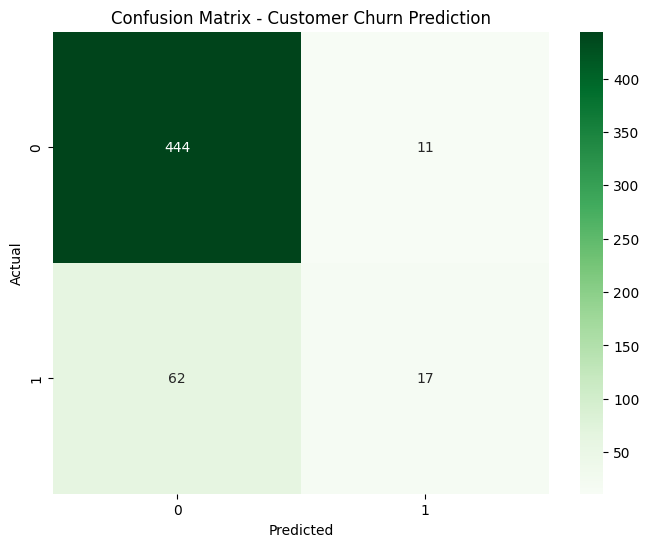

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


file_path = 'churn-bigml-80.csv'
try:
    df = pd.read_csv(file_path)
    print("Churn Dataset Loaded Successfully!")
except FileNotFoundError:
    print("Error: 'churn-bigml-80.csv' File not found.")


df = df.drop(['State', 'Area code'], axis=1)


le = LabelEncoder()
df['International plan'] = le.fit_transform(df['International plan'])
df['Voice mail plan'] = le.fit_transform(df['Voice mail plan'])
df['Churn'] = le.fit_transform(df['Churn'])


X = df.drop('Churn', axis=1)
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Customer Churn Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()